# Representation and Archetypes in Fictional Media

## Introduction

This final project is based around the [Open Psychometrics "Which Character" Quiz](https://openpsychometrics.org/tests/characters/documentation/). The quiz follows a standard internet format: Respondents assess themselves on series of opposed traits (e.g., are you more selfish or altruistic?), and at the end of the quiz, they are presented with their most similar fictional character (e.g., Batman or Buffy the Vampire Slayer). After the quiz has been completed, users are invited to rate the personalities of the characters themselves (e.g., is Batman more altruistic or selfish?). Open Psychometrics researchers have aggregated the ratings of 2,125 characters across 500 dimensions on a 100-point scale. The aggregate ratings are based on 3,386,031 user responses. Our work is inspired by the work of the [Vermont Computational Story Lab](https://compstorylab.org/archetypometrics/).

Our goal is to explore patterns in the data and investigate associations that may suggest deeper cultural norms about how certain categories of people are depicted in fiction. Specifically, we will investigate the `straight_queer`, `young_old`, `masculine_feminine`, and `rich_poor` demographic categories. By categorizing characters based on respondents' ratings on these dimensions, we are assessing how _perceptions_ of these categories are related to _perceptions_ of other dimensions. Lastly, we will identify key potential archetypes with a mixture of principal component analysis (PCA), Gaussian mixture model (GMM), and hierarchical agglomerative clustering (HAC).

## Data Description

The dataset `characters-aggregated-scores.csv` was downloaded from [Open Psychometrics](https://openpsychometrics.org/tests/characters/data/). Supplemental datasets called `variable-key.csv` and `character-key.csv` (to provide variable and character names) were developed based on the online documentation, which is available here as an `.html` file in the `data` folder. _Note: If downloading an updated version of the dataset, the data formats, character names, and variables might have changed._

The `characters-aggregated-scores.csv` has 2125 rows, 501 columns which include an id column which is an object data type and BAP# ratings, and no missing values. The `variable-key.csv` data set provides information about what the BAP# columns correspond to in terms of adjective pairs for the ratings. The `character-key.csv` provides information on the `id` column relating each row to the character and movie/novel source for that character.

The BAP# ratings are scored from 1-100, where values >=50 correspond to the right adjective while values <50 correspond to the left adjective in the adjective pairs. For example, if a character got a score of 60 for the "playful_serious" feature, they would be considered more "serious". If another character got score of 30 they would be considered more "playful".

See preview of the datasets below.

### Imports

In [125]:
import pandas as pd
from IPython.display import Image

### Load the Data

In [126]:
# here is modularized function for this section:
def initial_data_look(data): #import from python script later on
    print("Here are the first 5 rows of the data:")
    display(data.head())
    print("---------------------------------------------------------")
    print("The number of rows and columns in this dataset are", data.shape)
    print("---------------------------------------------------------")
    print("Here are the data types of each of the columns:")
    display(data.info())
    print("---------------------------------------------------------")
    print("Checking if there are any missing values:", np.mean(data.isna()))
    
char_score_data = pd.read_csv("data/characters-aggregated-scores.csv", sep=",")
var_key = pd.read_csv("data/variable-key.csv")
char_key = pd.read_csv("data/character-key.csv")

In [127]:
initial_data_look(char_score_data)

Here are the first 5 rows of the data:


,id,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,...,BAP491,BAP492,BAP493,BAP494,BAP495,BAP496,BAP497,BAP498,BAP499,BAP500
0,HML/1,62.4,69.8,92.6,31.9,61.2,53.5,28.8,44.0,63.9,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
1,HML/2,79.1,62.2,68.5,78.1,36.9,40.3,42.6,40.4,23.3,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
2,HML/3,83.2,85.3,69.4,21.8,39.1,35.8,49.9,16.0,59.3,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
3,HML/4,72.5,65.0,67.1,28.2,66.3,47.9,30.4,18.1,34.4,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
4,HML/5,40.7,48.1,81.8,90.0,52.6,59.3,41.1,73.9,43.0,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


---------------------------------------------------------
The number of rows and columns in this dataset are (2125, 501)
---------------------------------------------------------
Here are the data types of each of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Columns: 501 entries, id to BAP500
dtypes: float64(500), object(1)
memory usage: 8.1+ MB


None

---------------------------------------------------------
Checking if there are any missing values: 0.0


In [128]:
initial_data_look(var_key)

Here are the first 5 rows of the data:


,ID,scale
0,BAP1,playful_serious
1,BAP2,shy_bold
2,BAP3,cheery_sorrowful
3,BAP4,masculine_feminine
4,BAP5,charming_awkward


---------------------------------------------------------
The number of rows and columns in this dataset are (500, 2)
---------------------------------------------------------
Here are the data types of each of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      500 non-null    object
 1   scale   500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


None

---------------------------------------------------------
Checking if there are any missing values: 0.0


In [129]:
initial_data_look(char_key)

Here are the first 5 rows of the data:


,id,name,source
0,HML/1,Prince Hamlet,Hamlet
1,HML/2,Queen Gertrude,Hamlet
2,HML/3,King Claudius,Hamlet
3,HML/4,Polonius,Hamlet
4,HML/5,Ophelia,Hamlet


---------------------------------------------------------
The number of rows and columns in this dataset are (2125, 3)
---------------------------------------------------------
Here are the data types of each of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2125 non-null   object
 1   name    2125 non-null   object
 2   source  2125 non-null   object
dtypes: object(3)
memory usage: 49.9+ KB


None

---------------------------------------------------------
Checking if there are any missing values: 0.0


## Exploratory Data Analysis

### Data Preprocessing

We aggregated and cleaned the `characters-aggregated-scores.csv`, `variable-key.csv`, and `character-key.csv` datasets. Our preprocessing steps are as follows:
1. Merge character names and source from `character-key.csv` to `characters-aggregated-scores.csv`
2. Rename the columns based on the `variable-key.csv`
3. Drop a few specific columns:
   - BAPs with emojis which are hard to interpret and cause problems with visualization, so they have been labeled “INVALID.”
   - In addition, the authors accidentally included the “hard-soft” pair twice, so only the first pair is kept.

After cleaning up the data, there are more readable column names with the BAPs being the names of the adjective pairs. It is also clear which characters and sources each id corresponds to. Another big change to note is that there are still the same number of rows because there are no missing values, but there is now 464 BAP columns rather than 500 after removing duplicates and INVALID entries. We saved this aggregated and cleaned data as `char_score_data.csv`:

In [130]:
import pandas as pd
char_score_data = pd.read_csv("data/processed/char_score_data.csv")
char_score_data.head()

,id,character,source,playful_serious,shy_bold,cheery_sorrowful,masculine_feminine,charming_awkward,lewd_tasteful,intellectual_physical,...,cringing-away_welcoming-experience,stereotypical_boundary-breaking,energetic_mellow,hopeful_fearful,likes-change_resists-change,manic_mild,old-fashioned_progressive,gross_hygienic,stable_unstable,overthinker_underthinker
0,HML/1,Prince Hamlet,Hamlet,62.4,69.8,92.6,31.9,61.2,53.5,28.8,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
1,HML/2,Queen Gertrude,Hamlet,79.1,62.2,68.5,78.1,36.9,40.3,42.6,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
2,HML/3,King Claudius,Hamlet,83.2,85.3,69.4,21.8,39.1,35.8,49.9,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
3,HML/4,Polonius,Hamlet,72.5,65.0,67.1,28.2,66.3,47.9,30.4,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
4,HML/5,Ophelia,Hamlet,40.7,48.1,81.8,90.0,52.6,59.3,41.1,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


### Data Exploration

1. Most Right vs. Most Left BAPs

In [140]:
# import from python file
def most_right(data, column_name):
    most_right = data.nlargest(n=10, columns=[column_name])
    most_right = most_right[["character", "source", column_name]]
    print(most_right)

def most_left(data, column_name):
    most_right = data.nsmallest(n=10, columns=[column_name])
    most_right = most_right[["character", "source", column_name]]
    print(most_right)

In [141]:
most_right(char_score_data, "charming_awkward")

                character                        source  charming_awkward
816        Emma Pillsbury                          Glee              93.1
1264  Mr. William Collins           Pride and Prejudice              93.0
762          Tina Belcher                 Bob's Burgers              92.2
1016         Kirk Gleason                 Gilmore Girls              91.7
2063         Buster Bluth          Arrested Development              91.6
909          Stuart Bloom           The Big Bang Theory              91.4
1324                James  The End of the F***ing World              91.3
345            Jonah Ryan                          Veep              90.8
2064         Tobias Funke          Arrested Development              90.8
672           Morty Smith                Rick and Morty              90.6


In [142]:
most_left(char_score_data, "charming_awkward")

                character                source  charming_awkward
1142         Neal Caffrey          White Collar               3.1
2092           James Bond  Tommorrow Never Dies               4.4
248           Inara Serra    Firefly + Serenity               4.8
556   Lucifer Morningstar               Lucifer               6.4
1223       Frank Abagnale   Catch Me If You Can               6.5
203            Don Draper               Mad Men               6.7
1534      Damon Salvatore   The Vampire Diaries               6.8
1545             Lagertha               Vikings               6.9
207         Joan Holloway               Mad Men               7.4
63         Derek Shepherd        Grey's Anatomy               7.7


The functions above allow you to input the data and the name of the column you are most interested in. `most_right()` will print the top 10 highest scores for the right-hand term, while `most_left()` will print the top 10 highest scores for the left-hand term which are technically the lowest scores on that dimension. In this example, we explored the 10 most charming and awkward characters in the dataset and found that Emma Pillsbury from Glee is rated the most awkward character vs. Neal Caffrey is rated as the most charming.

2. Scores with Highest/Lowest Averages for each character

In [143]:
# in python file to import
char_score_data["average_rankings"] =  char_score_data.iloc[:, 3:465].mean(axis=1)

def explore_bap_averages(data, groups=False):
    # complete dataset aggregation for a simple overview
    if not groups:
        overall_min = data["average_rankings"].min()
        overall_max = data["average_rankings"].max()

        return data.loc[
            (data["average_rankings"] == overall_min) |
            (data["average_rankings"] == overall_max),
            ["character", "source", "average_rankings"]
        ]

    # intermediate function to help with group-wise operations
    def summarize_group(df):
        min_idx = df["average_rankings"].idxmin()
        max_idx = df["average_rankings"].idxmax()

        return pd.Series({
            "num_characters": df["character"].nunique(),
            "min_character": df.loc[min_idx, "character"],
            "min_ranking": df.loc[min_idx, "average_rankings"],
            "max_character": df.loc[max_idx, "character"],
            "max_ranking": df.loc[max_idx, "average_rankings"],
            "avg_average_rankings": df["average_rankings"].mean(),
            "std_average_rankings": df["average_rankings"].std()
        })

    return (
        data
        .groupby("source", as_index=False)
        .apply(summarize_group, include_groups=False)
        .sort_values("num_characters", ascending=False)
        .reset_index(drop=True)
    )

In [144]:
# explore overall min and max rankings
explore_bap_averages(char_score_data, groups = False)

,character,source,average_rankings
1495,Cyril Figgis,Archer,53.890693
1549,Ragnar Lothbrok,Vikings,46.743506


It looks like overall the `average_rankings` across all the characters range from roughly 46 to 54, which makes sense that there isn't much variation because all 462 binary adjective pairs (BAPs) cancel each other out at some point. Also, it's important to note that on it's own the `average_rankings` isn't fully interpretable.

3. Explored BAP/column-wise averages and plotted them on a histogram

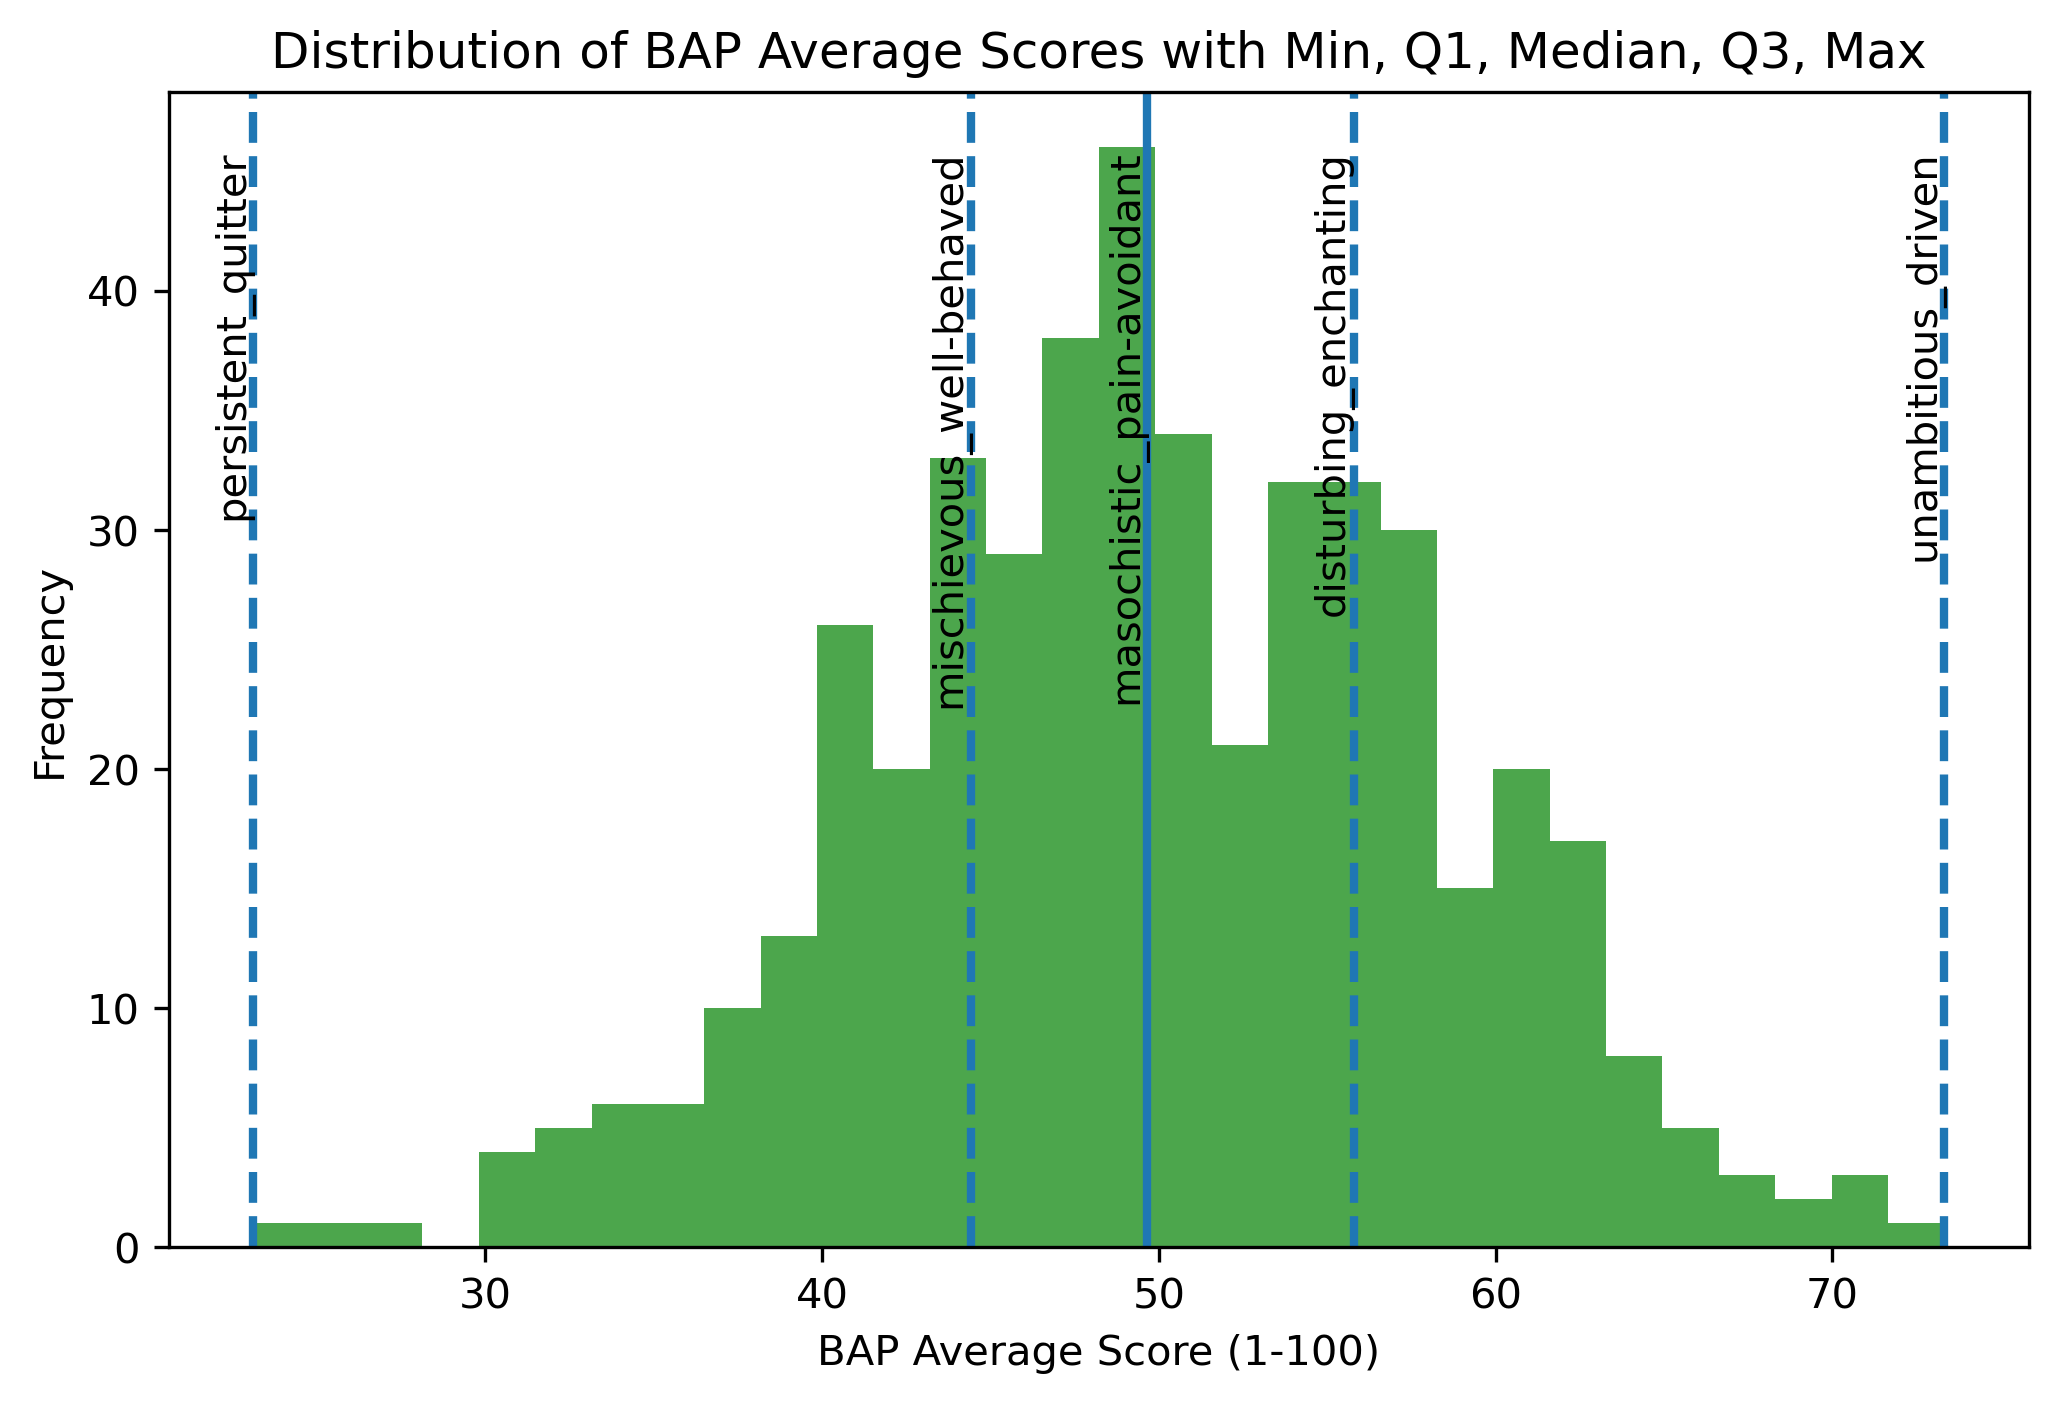

In [135]:
Image(filename = "visualizations/bap_averages_histogram.png")

For “unambitious_driven,” the average ratings are skewed toward driven, suggesting that characters are generally perceived as driven rather than unambitious. In contrast, “persistent_quitter” shows ratings concentrated closer to persistent, indicating that characters are more often characterized as persistent than as quitters. Together, these patterns suggest that in movie character development, traits such as being driven and persistent are more commonly emphasized or recognized by viewers than their opposing traits.

4. Plotted a histogram of the standard deviations within each BAP column.

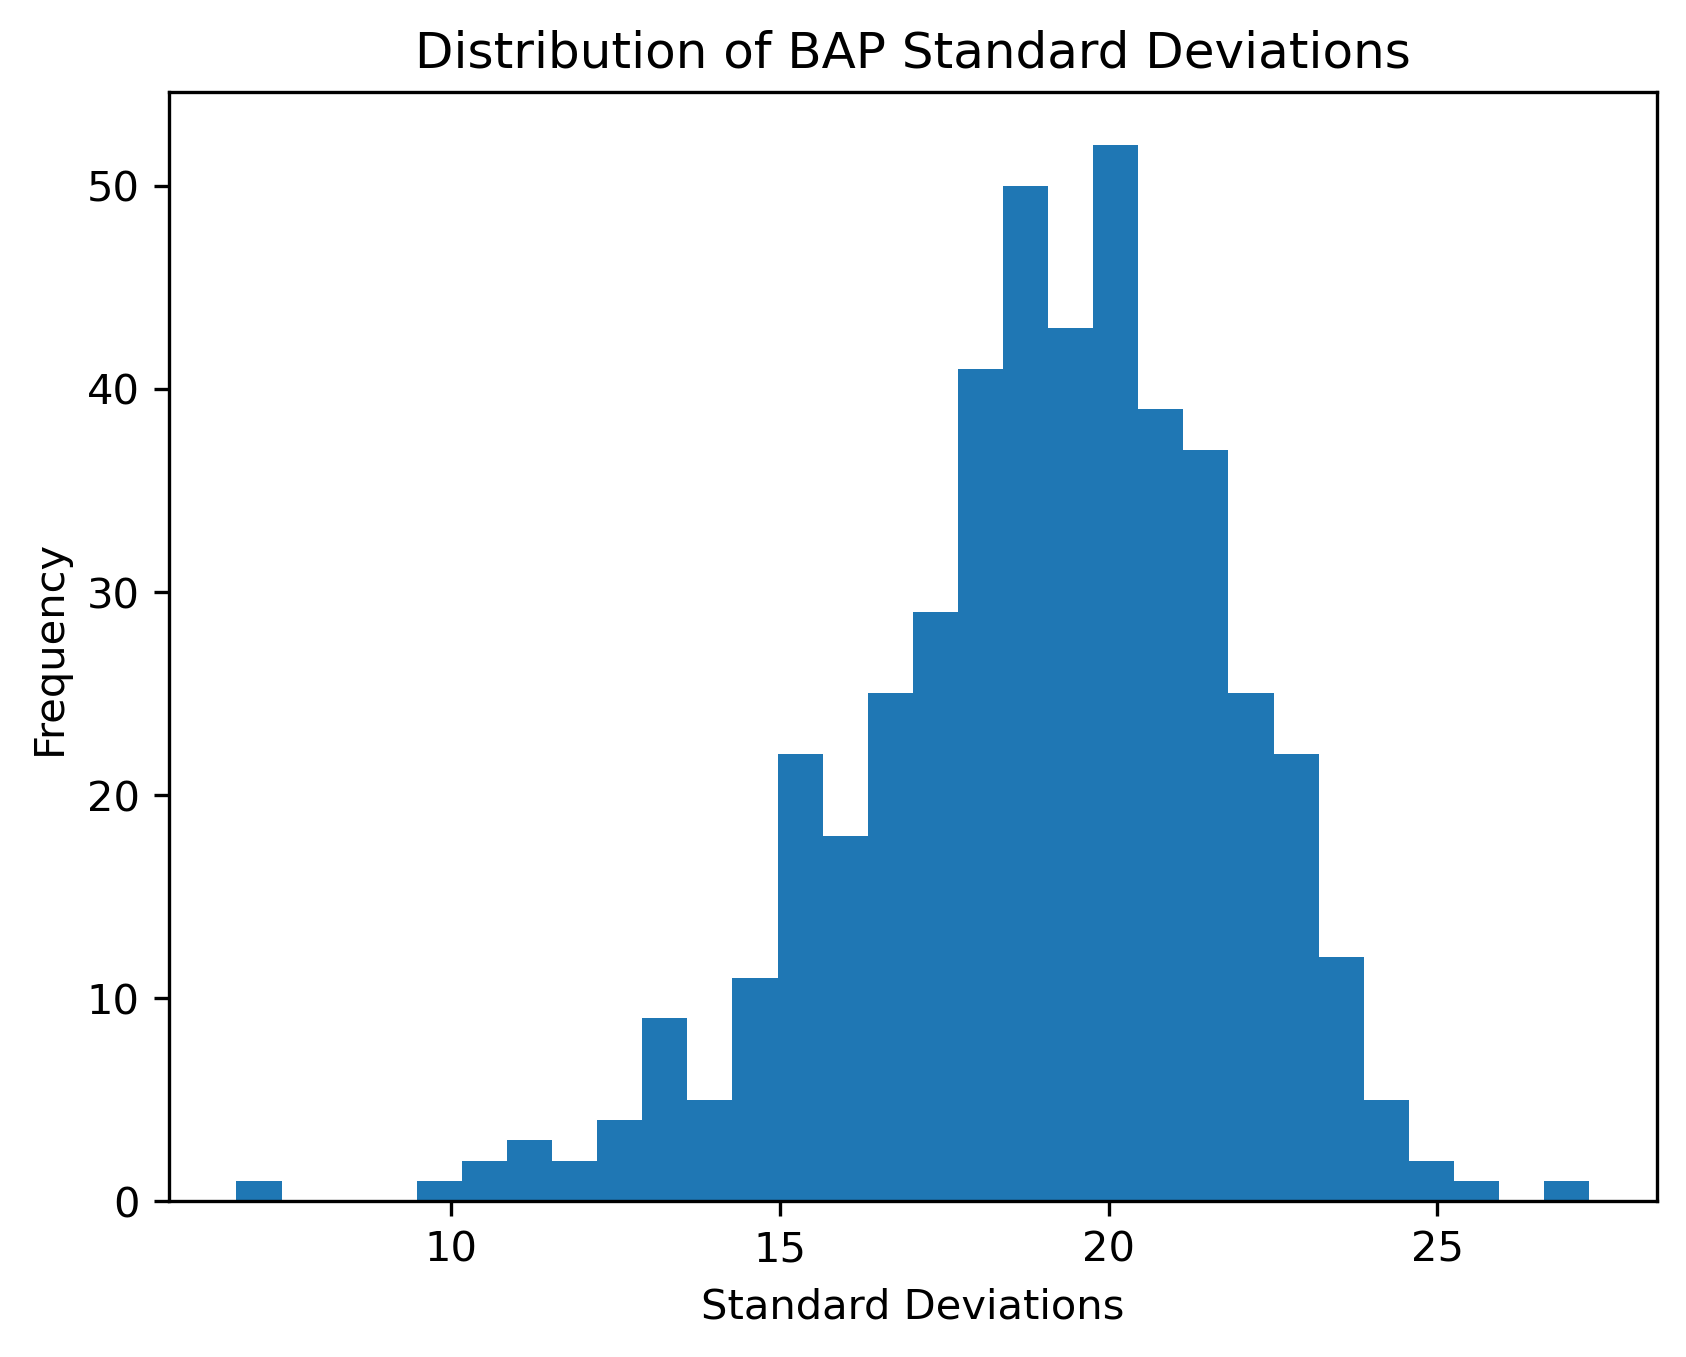

In [132]:
Image(filename = "visualizations/bap_std_histogram.png")

The BAP ratings seem to vary from their means as much as approximately 28 scores to about 6. While on average they seem to vary close to about 20 scores. BAPs like “right-brained left-brained” or “Coke Pepsi” might not be very hard to discern characters that are on the polar opposites since they aren’t very intuitive as to what a more right-brained person looks like or a more “Coke” person is. On the other hand, for BAPs like “masculine feminine” or “parental childlike”, it is clearer and more intuitive to understand what more female than male means or what being more of a main character than side character looks like.

5. Plotted a correlation matrix between the BAP columns for a better understanding for the data before PCA.

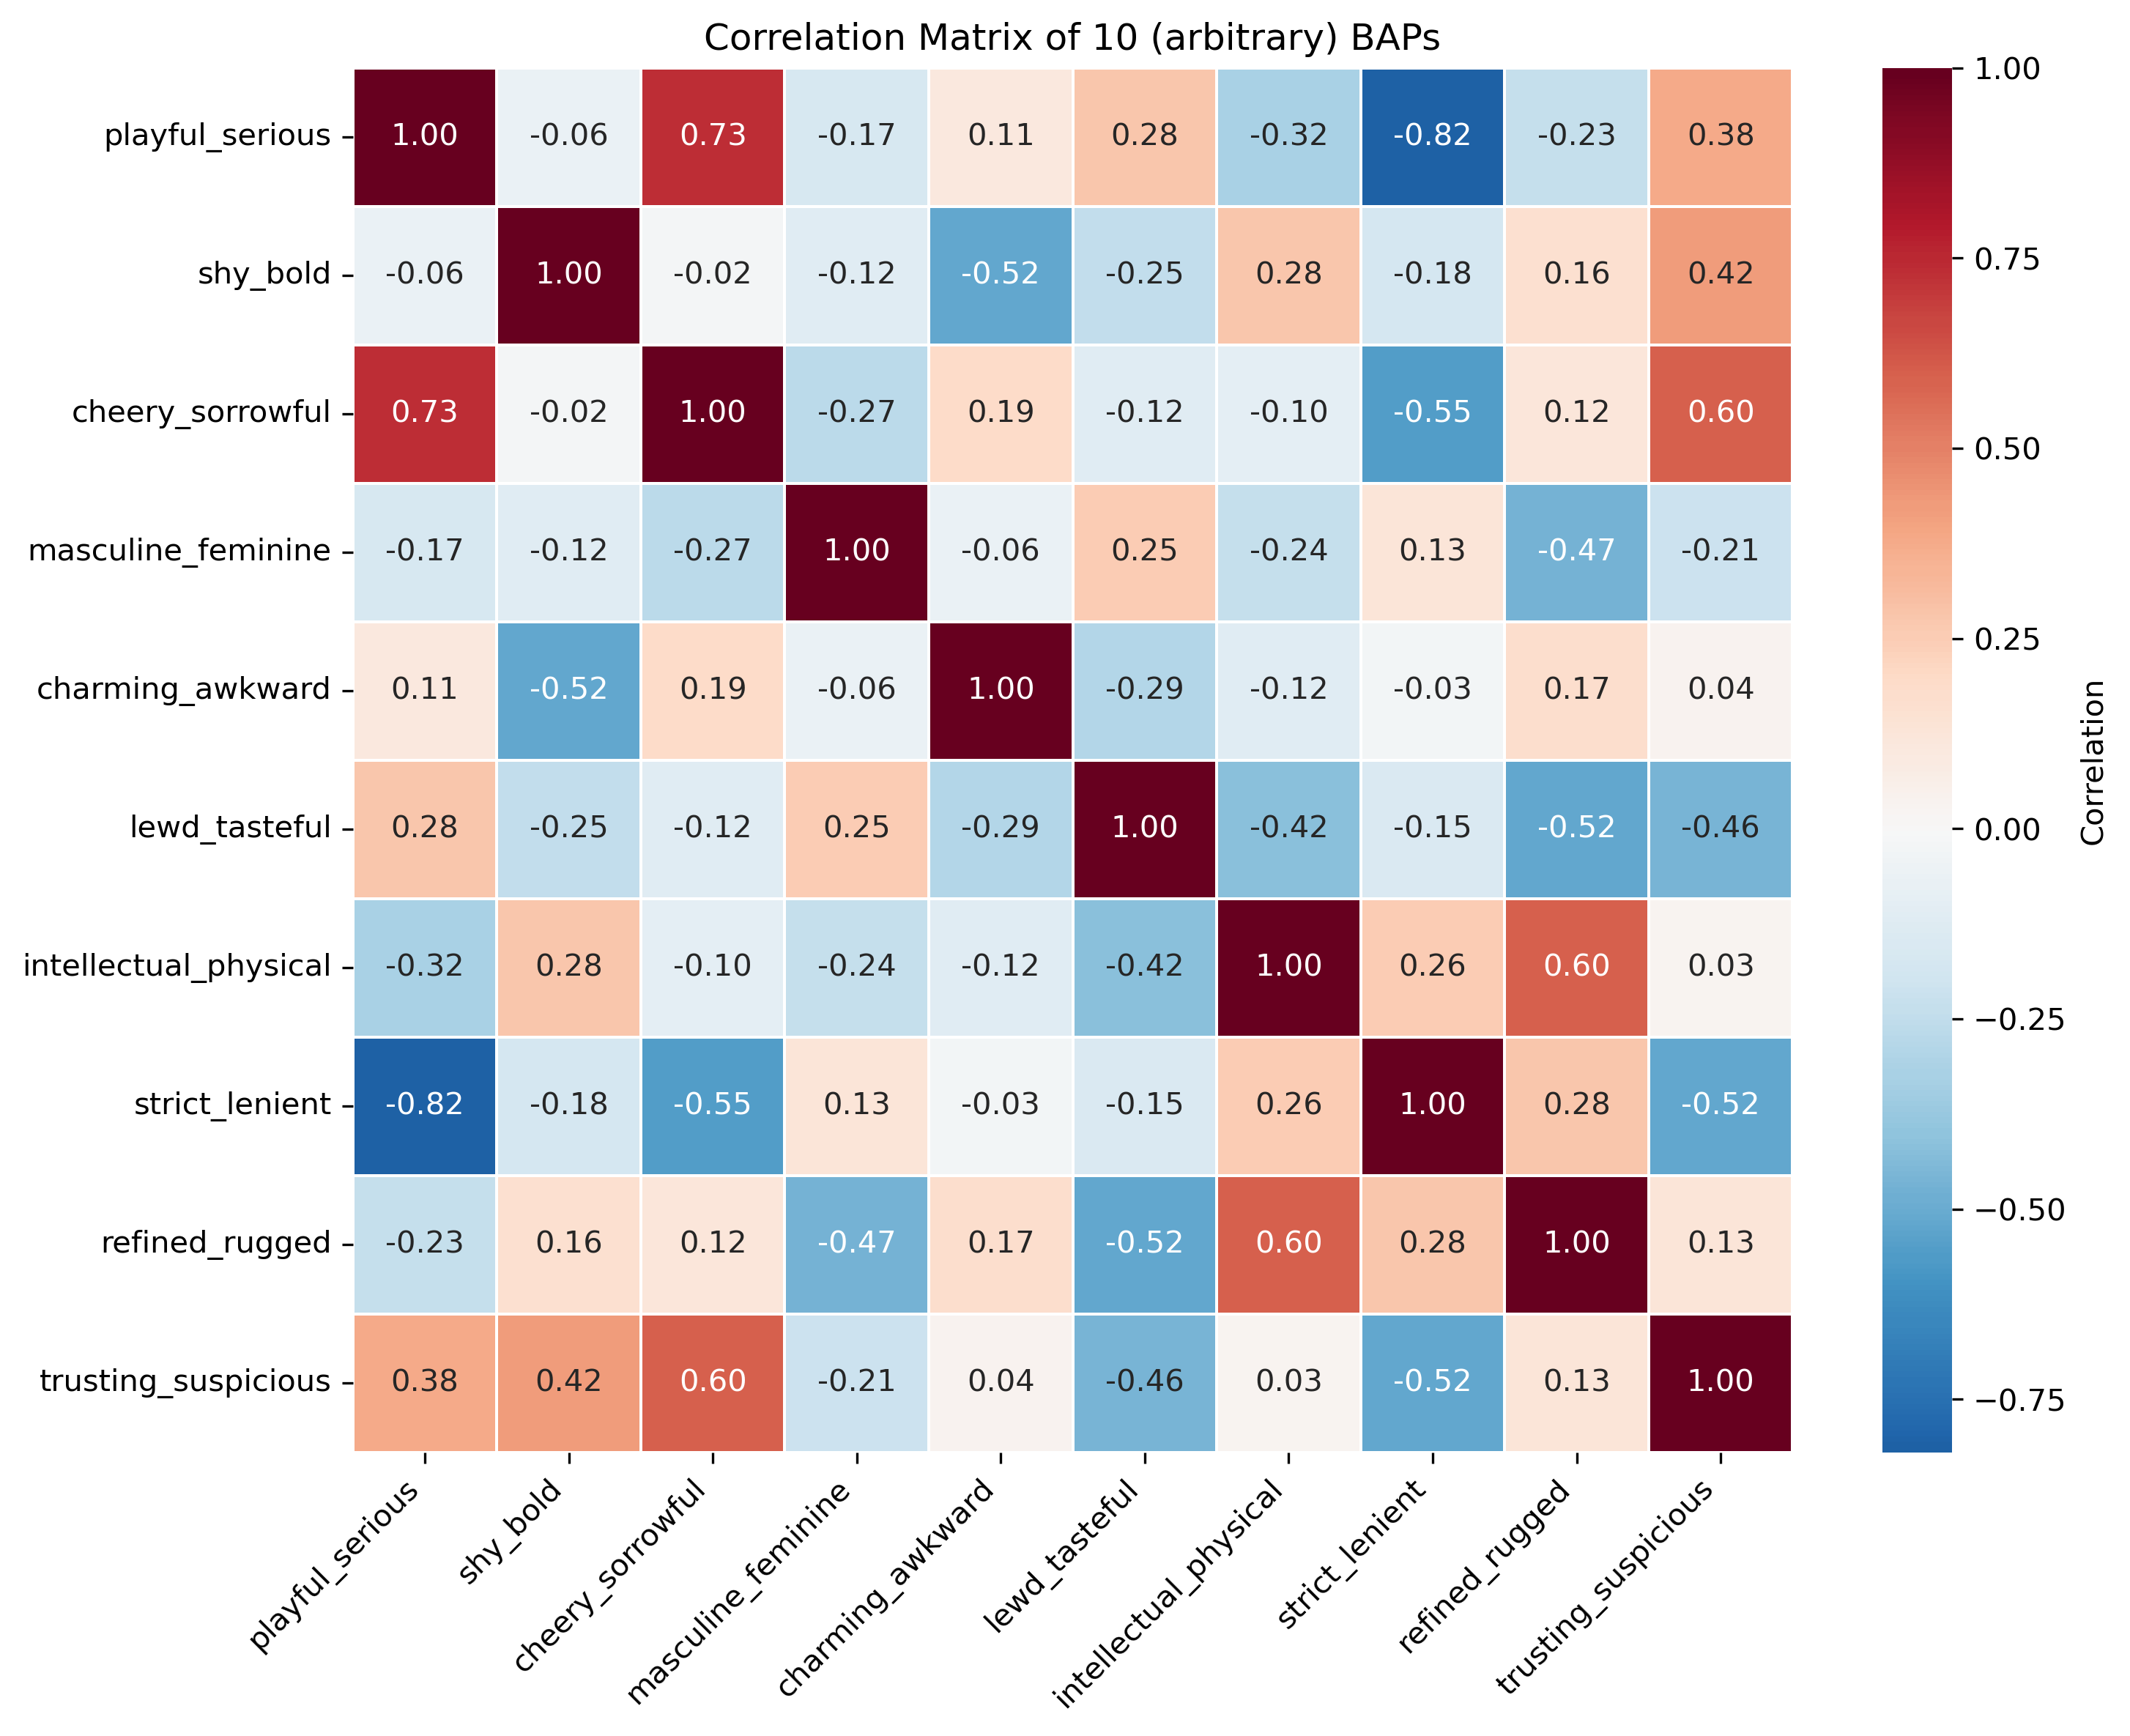

In [136]:
Image(filename = "visualizations/default_correlation_map.png")

In the correlation matrix, there are some variables that are very strongly correlated like "playful_serious" and "strict_lenient" are strongly negatively correlated assuming they have a linear relationship. This makes sense because people who are more playful are likely also lenient while those who are serious are strict. There are also a lot of close to uncorrelated variables like "trusting_suspicious" and "intellectual_physical" where they don’t seem to be related in a certain way.

6. Average rankings distribution for the top 10 sources or media sources with the most number of characters.

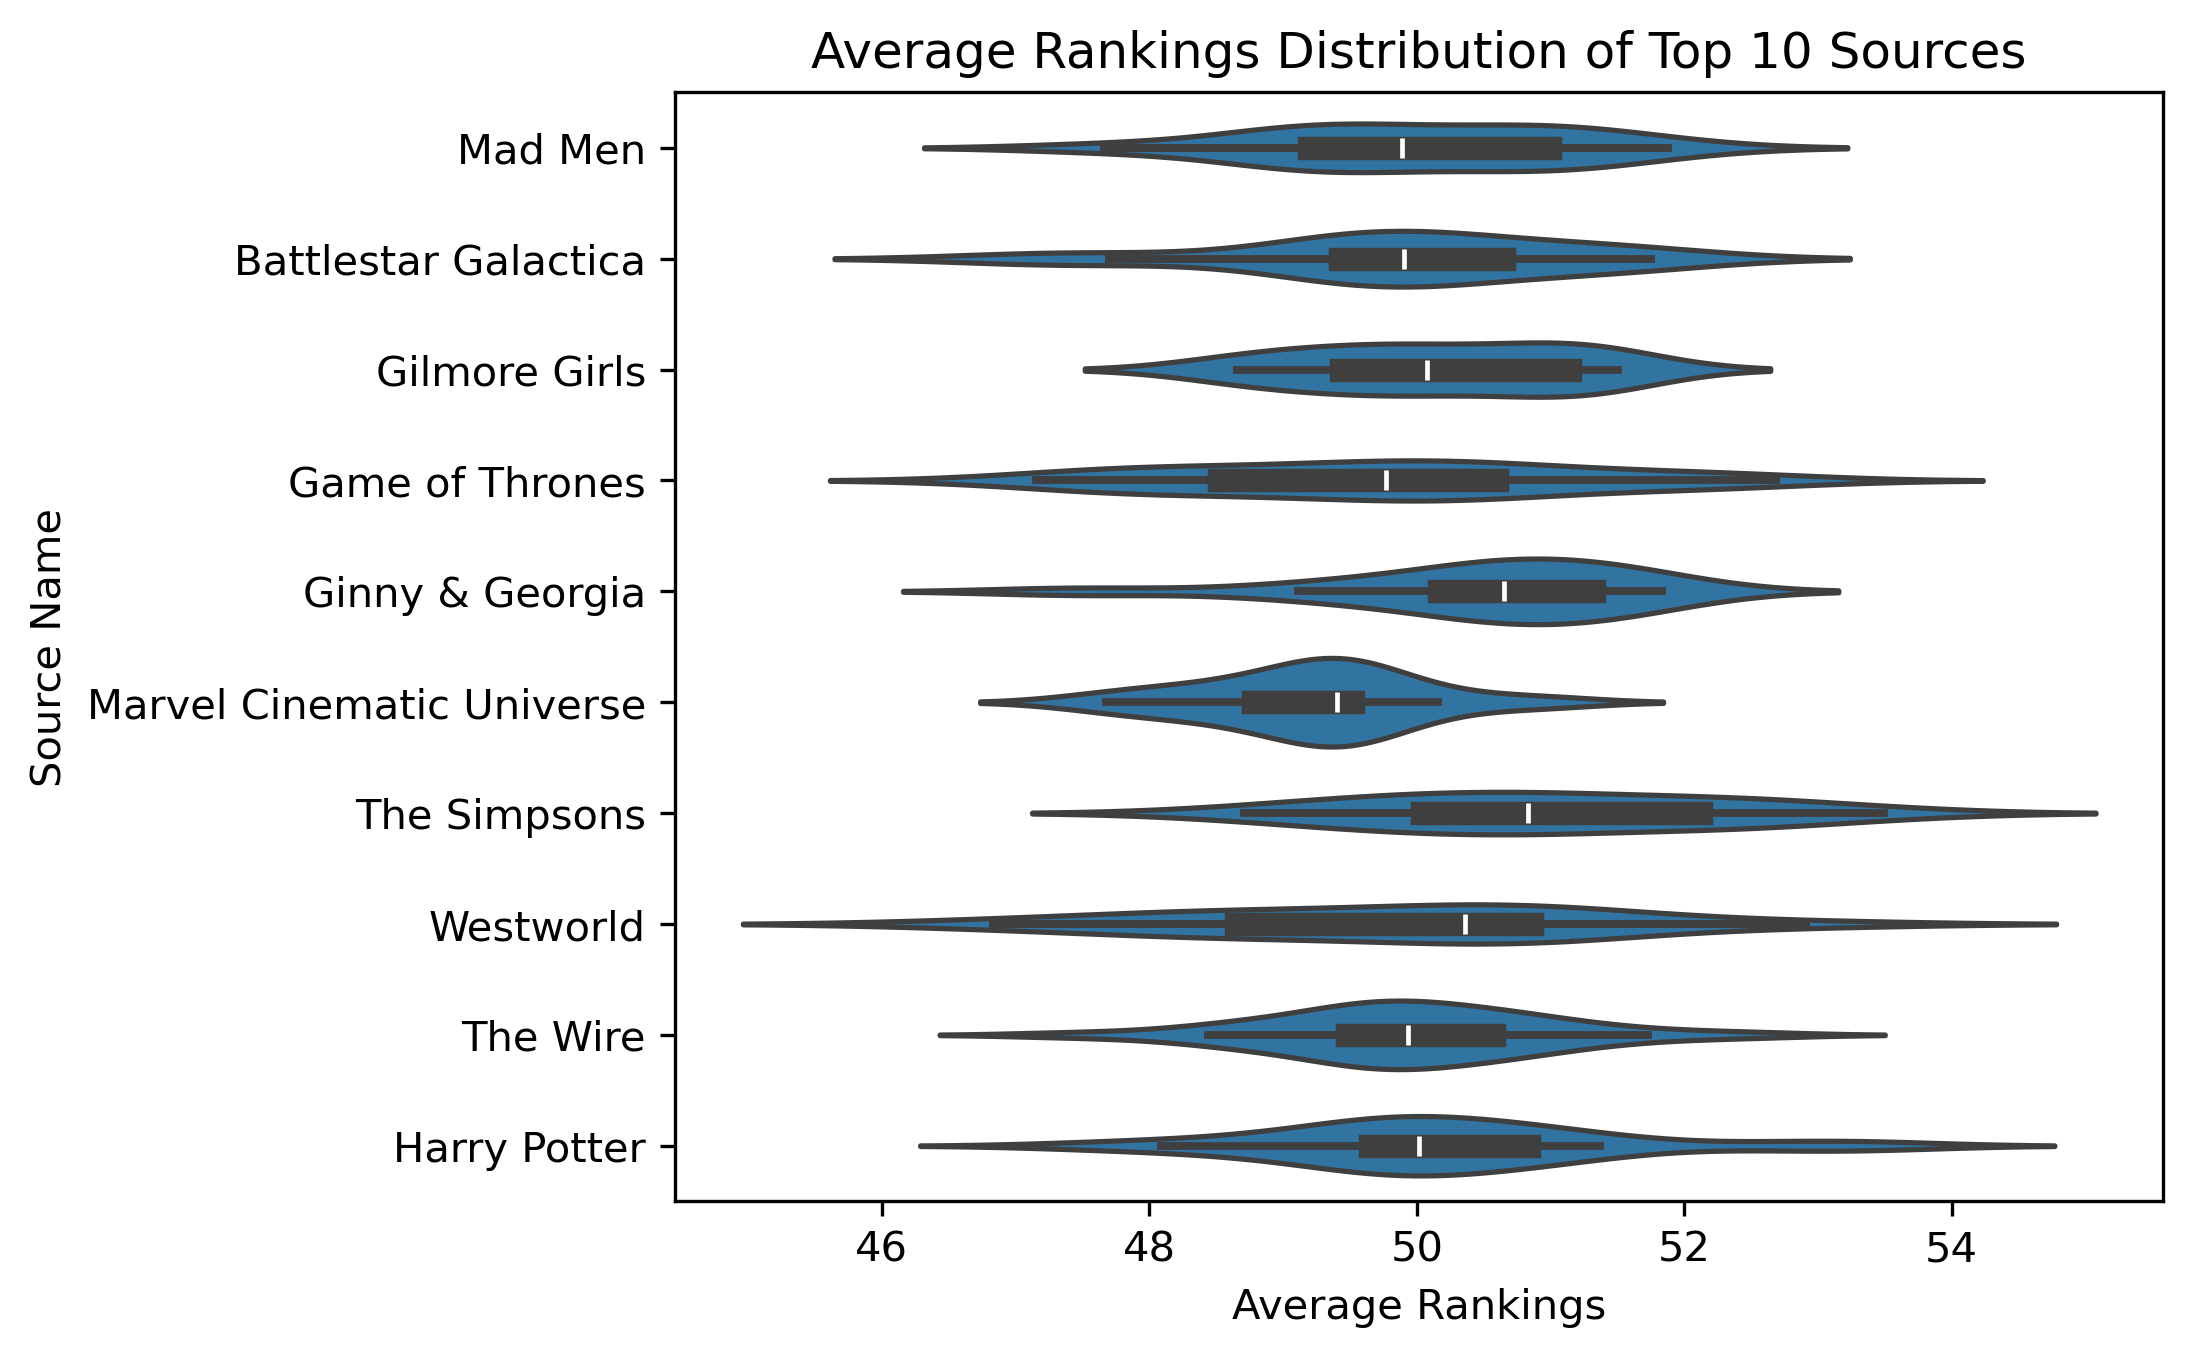

In [139]:
Image(filename = "visualizations/average_rankings_for_top10_sources.png")

While the average rankings roughly center around 50, characters in the Marvel Cinematic Universe have, on average, slightly lower ratings than average, while Westworld characters have higher ratings than the average.

## Finding Associations

From the exploratory data analysis, we found fun associations that fans would likely find amusing or obvious. But there are also associations that may suggest deeper cultural norms about how certain categories of people are depicted in fiction. In this section, we look at four dimensions that speak to important demographic categories: `straight_queer`, `young_old`, `masculine_feminine`, and `rich_poor`. It is important to note that, by categorizing characters based on respondents' ratings on these dimensions, we are assessing how _perceptions_ of these categories are related to _perceptions_ of other dimensions.